## Visualizing Trajectories

In [1]:
import os, sys
from datetime import datetime, date
import pandas
import pickle
import plotly
import plotly.express as px
import plotly.graph_objects as go
sys.path.append('..')
from covid_and_bigdata.presentation.topic_modeling import plot_perplexity_of_train_and_test
from covid_and_bigdata.processing.dataframes import get_dataframe_and_prepare
from covid_and_bigdata.meta import important_events
from covid_and_bigdata.presentation.trajectories import get_go_figure

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


/Users/mednet_machine/mypy/lib/python3.7/site-packages/urllib3/_collections.py:2: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
/Users/mednet_machine/mypy/lib/python3.7/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.


INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [ ]:
df = get_dataframe_and_prepare(filepath='../resources/data/files/df_with_symptoms_and_hate_score.csv')

In [ ]:
df.character_length.max()

In [ ]:
with open('../resources/data/files/location_aggregates.pkl', 'rb') as handle:
    tmp_dfs = pickle.load(handle)

In [ ]:
tmp_dfs['per_state_mean'].columns

In [6]:
important_events

[{'date': '2020-01-21',
  'title': 'Announcing First COVID-19 Case',
  'description': 'On January 21, the US announced its first case of the coronavirus that has swept China. So far, China has reported more than 300 cases and 9 deaths. The US citizen recently traveled from China, and has been treated at a hospital in Seattle. On January 24, a second case was confirmed in the US. The woman was traveling back to Chicago from China. The US is considering evacuating other citizens in Wuhan. (BBC)'},
 {'date': '2020-02-08',
  'title': 'First American Death due to COVID-19',
  'description': '\n    On February 8, the first American citizen died of the coronavirus in Wuhan. The death was announced hours after two flights evacuated US citizens from Wuhan. This is the first American to die from the virus that has killed hundreds in China. (CNN)\n    '},
 {'date': '2020-03-23',
  'title': 'Stimulus Package #1 Approved by Senate',
  'description': '\n    On March 23, the Senate finally passed a s

## Avg Hate Prob as COVID-19 is getting worse in US

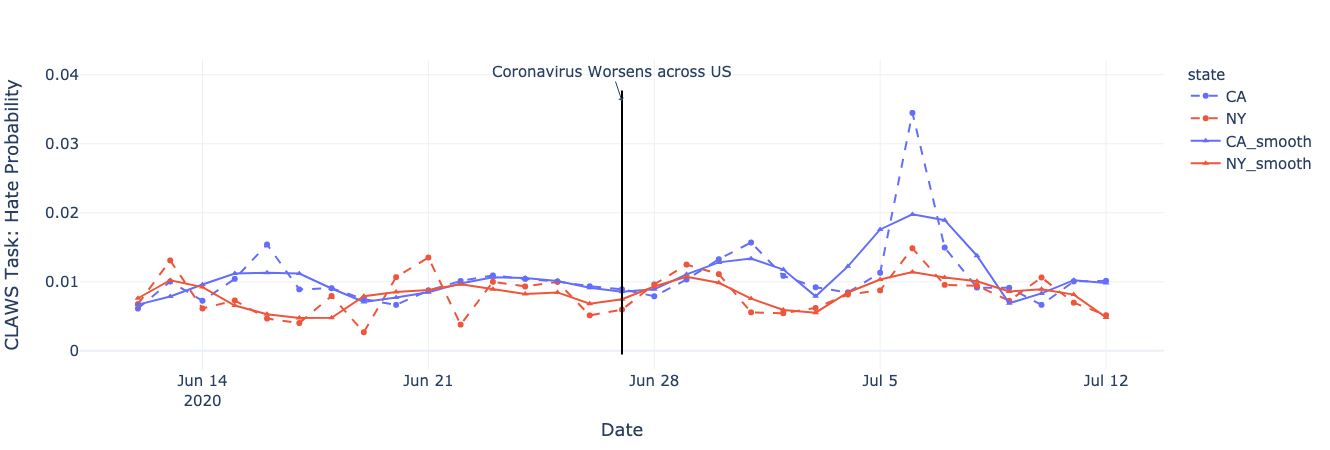

In [21]:
tmp_df = tmp_dfs['per_state_mean'].copy()
tmp_df = tmp_df[tmp_df.state.isin(['CA', 'NY'])]
event = important_events[6]
fig = get_go_figure(
    tmp_df=tmp_df, 
    events=[important_events[6]],
    half_window_days=15,
    y='hate_prob', 
    title='', 
    resolution='state',
    mode='markers+lines', 
    line= (dict(dash='dash'), dict()),
    font_size=50
)
fig.layout.font.size=15
fig.show()

In [22]:
fig.write_image('trajectories/ca_ny_covidworsensevent_hateprob.pdf', width=1000, height=350)

## Avg Counter-hate Prob as BLM protests begin: CA and NY

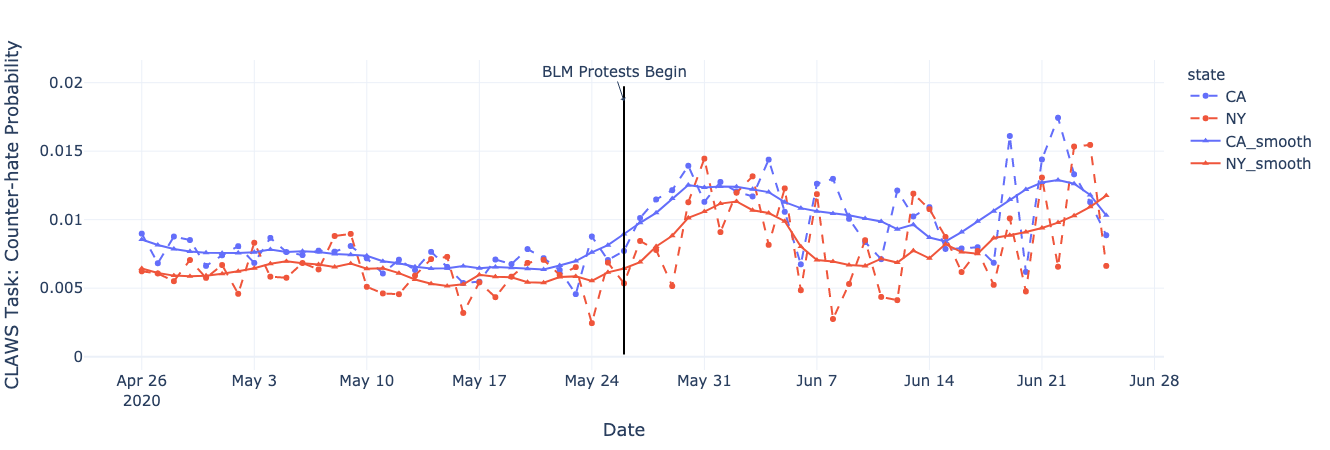

In [29]:
tmp_df = tmp_dfs['per_state_mean'].copy()
tmp_df = tmp_df[tmp_df.state.isin(['CA', 'NY'])]
event = important_events[5]
fig = get_go_figure(
    tmp_df=tmp_df, 
    events=[event],
    half_window_days=30,
    y='counterhate_prob', 
    title='', 
    resolution='state',
    mode='markers+lines', 
    line= (dict(dash='dash'), dict())
)
fig.layout.font.size=15
fig.show()

In [30]:
fig.write_image('trajectories/ca_ny_more_counterhate_as_blm_begins.pdf', width=1000, height=500)

## Potential COVID-19 Acquisition Reports through Time

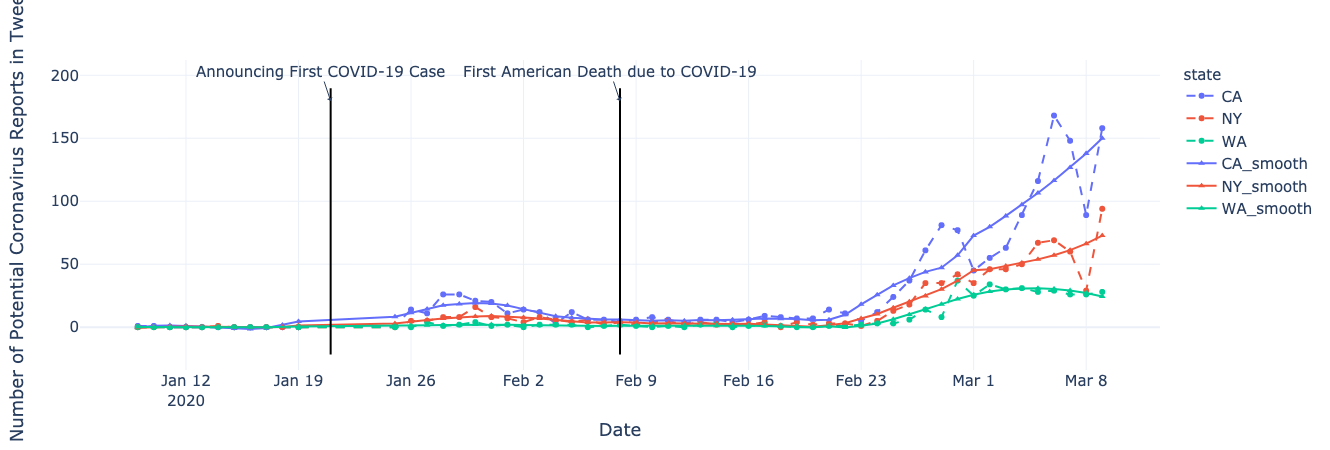

In [37]:
tmp_df2 = df.groupby(['state', 'date']).sum().reset_index().copy()
tmp_df = tmp_df2[tmp_df2.state.isin(['CA', 'NY', 'WA'])]
event = important_events[1]
fig = get_go_figure(
    tmp_df=tmp_df, 
    events=[important_events[1], important_events[0]],
    half_window_days=30,
    y='<covid_report>_count', 
    title='', 
    resolution='state',
    mode='markers+lines', 
    line= (dict(dash='dash'), dict())
)
fig.layout.font.size=15
fig.show()

In [36]:
fig.write_image('trajectories/canywa_covid_reports.pdf', width=1500, height=500)

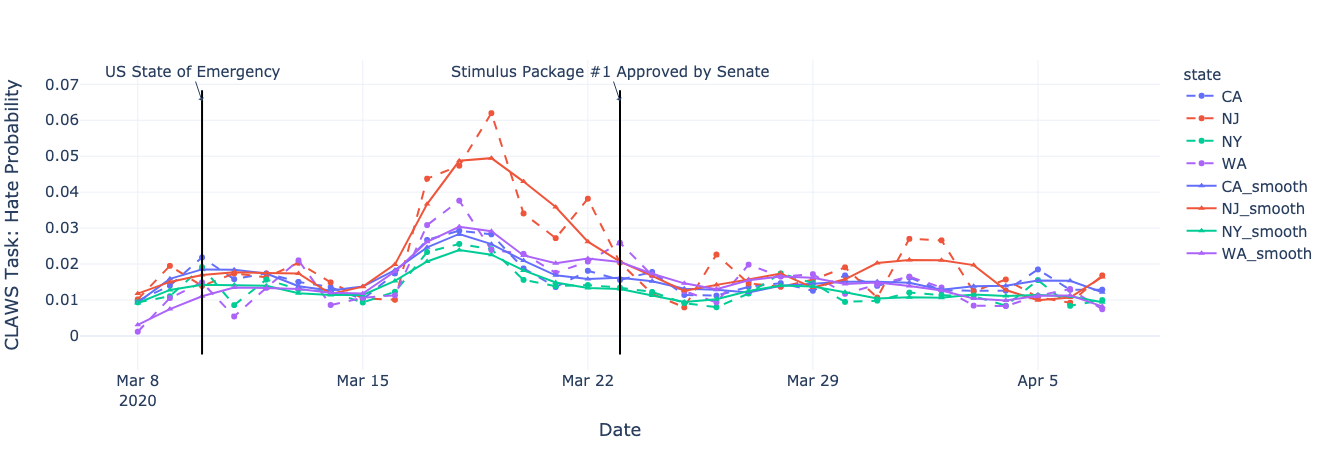

In [27]:
tmp_df = tmp_dfs['per_state_mean'].copy()
tmp_df = tmp_df[tmp_df.state.isin(['CA', 'NY', 'WA', 'NJ'])]
event = important_events[2]
fig = get_go_figure(
    tmp_df=tmp_df, 
    events=[event, important_events[3]],
    half_window_days=15,
    y='hate_prob', 
    title='', 
    resolution='state',
    mode='markers+lines', 
    line= (dict(dash='dash'), dict())
)
fig.layout.font.size=15
fig.show()

In [28]:
fig.write_image('trajectories/hateprob_in_onset_and_stimulus.pdf', width=1500, height=500)

In [ ]:
tmp_df = df.sort_values(by=['<covid_report>_count'], ascending=False).copy()

In [ ]:
tmp_df.iloc[11]['<covid_report>']

In [ ]:
tmp_df.iloc[11]['tweet']

## Trajectories

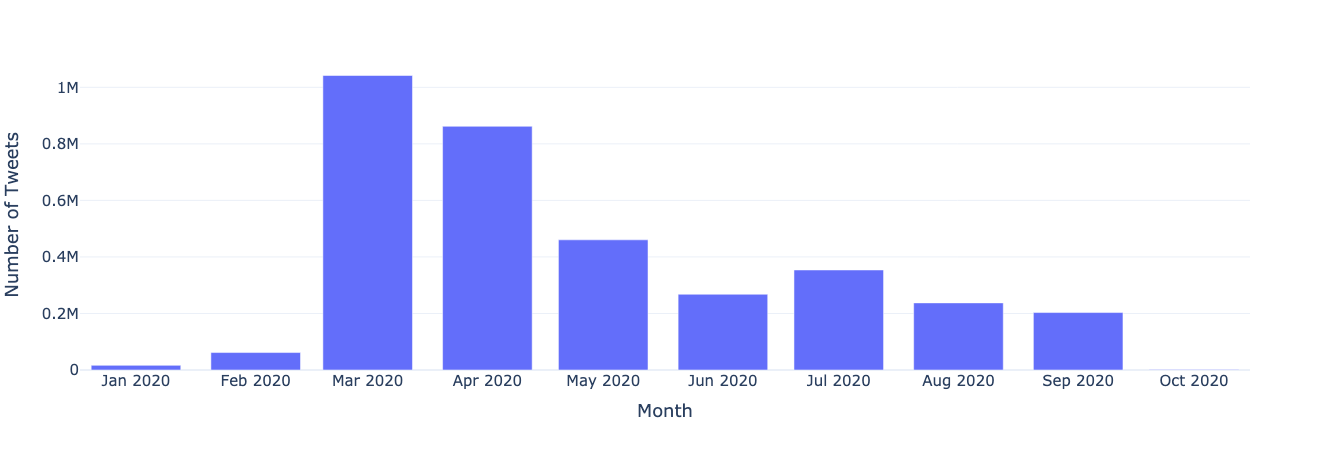

In [46]:
tmp_df = df.loc[:, ['month']].copy()
tmp_df['Number of Tweets'] = 1
tmp_df = tmp_df.groupby('month').sum().reset_index()

fig = px.bar(tmp_df, x='month', y='Number of Tweets')
fig.update_layout(yaxis_title='Number of Tweets', xaxis_title='Month', template='plotly_white')
fig.layout.font.size=15
fig.show()

In [50]:
fig.write_image('covid_tweet_per_month_distribution_fixedfont.pdf', width=500, height=500)